Author: Tenzin Tashi <br/>
CSc: 44700 - ML <br/>
Assignment 3<br/>

### Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Import the Iris data set


In [ ]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
x_min, x_max = X.min() - 0.5, X.max() + 1.5

### Get Iris classifications

In [ ]:
IC = np.unique(Y)
IrisC = ('Setosa','Versicolor','Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue','lightgreen')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen


### Setup Iris feature lablels


In [ ]:
IrisF = iris.feature_names
for i in range(0,4):
    print(IrisF[i])

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


### Function to create sample array of features and classes from the original set

In [ ]:
def sample_features_classes(classes: list, features: list):
    ''' 
    Function to create a sub-set of sample array of features and classes from the original 
    dataset from the given list of classes and features.
    
    Parameters
    ----------
    classes: list
             This array contains the classes to be considered.
             It can be either 2 classes or all 3 classes (i.e., between 2-3). 
    features: list
              This array contains the features to be considered.
              It can be either a list of 1 features or a list of all 4 features (i.e., between 1-4).
    
    Returns
    -------
    XX: nArray
        It includes only the features from the original dataset specified for the given list of features.
    YY: nArray
        It includes only the classes from the original dataset specified in the given list of classes.
    '''
    global X, Y, IC
    
    cdx = np.array(classes)        # this array contains the classes to be considered (can be 2-3 classes)
    fdx = np.array(features)       # this array contains the features to be considered (can be 1-4 features)
    
    nC = len(cdx)
    nF = len(fdx)
    
    print ('\nClasses')
    for i in range(nC):
        print (cdx[i],IrisC[cdx[i]])

    print ('\nFeatures')
    for i in range(nF):
        print (fdx[i],IrisF[fdx[i]])
    
    i = 0
    numY = 0
    
    for i in range(len(Y)):
        for j in range(nC):
            if Y[i] == IC[cdx[j]]:
                numY += 1
    
    YY = np.zeros((numY))
    XX = np.zeros((numY,nF))
    
    j = 0
    for i in range(len(Y)):
        for k in range(nC):
            if Y[i] == IC[cdx[k]]:        
                YY[j] = IC[cdx[k]]
                for m in range(nF):
                    XX[j,m] = X[i,fdx[m]] 
                j += 1
    
    return XX, YY

In [ ]:
def draw_graph(XX, YY, cdx: list, fdx: list, clf):
    '''
    Funtion to draw graph
    
    Code from Professor Erik's sample code
    
    Parameters
    ----------
    XX: nArray
        This array contains the sample features from the original dataset.
    YY: nArray
        This array contains the sample classes from the original dataset.
    cdx: List
         This array contains the classes to be considered.
         It can be either 2 classes or all 3 classes (i.e., between 2-3). 
    fdx: list
         This array contains the features to be considered.
         It can be either a list of 1 features or a list of all 4 features (i.e., between 1-4)
    clf: Class Object:
         Object of a given classifier
    
    '''
    global IC
    if (len(fdx) == 1):
        XXzeros0 = (0. * XX) + .2
        XXzeros1 = (0. * XX) 
        XXzeros2 = (0. * XX) - .2
    
    if len(fdx) == 1:
        fig, ax = plt.subplots(figsize=(8,2))
    
        xx = np.arange(x_min,x_max, 0.05).reshape((-1,1))
        yy = clf.predict(xx)

        xxzeros1 = (0. * xx) + .5

        # plot the decision regions

        if (IC[0] in cdx): ax.scatter(xx[yy == IC[0],0], xxzeros1[yy == IC[0]],
                        color=pltC[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx[yy == IC[1],0], xxzeros1[yy == IC[1]],
                        color=pltC[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx[yy == IC[2],0], xxzeros1[yy == IC[2]],
                        color=pltC[2], marker='.')   

        # plot the data

        if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XXzeros0[YY == IC[0]],
                        color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XXzeros1[YY == IC[1]],
                        color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XXzeros2[YY == IC[2]],
                        color=pltC[2], marker=pltM[2], label=IrisC[2])    

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(-1.,+2.)
        ax.set_xlabel(IrisF[fdx[0]])
        ax.axes.yaxis.set_visible(False)
        ax.legend(loc='upper right', fontsize='x-small')
        plt.show()    

    elif (len(fdx) == 2):

        fig, ax = plt.subplots(figsize=(8,8))

        xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
        yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        yy = yy.reshape(xx1.shape)

        # plot the decision regions    

        if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
                        color=pltCback[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
                        color=pltCback[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
                        color=pltCback[2], marker='.')    

        # plot the data

        if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XX[YY == IC[0],1],
                        color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XX[YY == IC[1],1], 
                        color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XX[YY == IC[2],1],
                        color=pltC[2], marker=pltM[2], label=IrisC[2])

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_xlabel(IrisF[fdx[0]])
        ax.set_ylabel(IrisF[fdx[1]])
        ax.legend(loc='upper right', fontsize='small')
        plt.show()    

    elif (len(fdx) == 3):
    
        ixm = fdx[0]
        iym = fdx[1]
        izm = fdx[2]
        xF = IrisF[ixm]
        yF = IrisF[iym]
        zF = IrisF[izm]

        fig = plt.figure(figsize=(6,6))    
        ax = plt.axes(projection='3d')   

    # plot the data points

        if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
            color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
            color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
            color=pltC[2], marker=pltM[2], label=IrisC[2])    

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_zlim(x_min,x_max)
        ax.set_xlabel(xF)
        ax.set_ylabel(yF)
        ax.set_zlabel(zF)            
        ax.legend(loc='upper right', fontsize='small')
        plt.show() 

    # if there are two classes, add the decision boundary and plot again

        A = clf.fit(XX,YY)
        Acl =  A.classes_
        if (len(Acl) == 2):  

            fig = plt.figure(figsize=(6,6))    
            ax = plt.axes(projection='3d')   

        # plot the data points

            if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
                color=pltC[0], marker=pltM[0], label=IrisC[0])
            if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
                color=pltC[1], marker=pltM[1], label=IrisC[1])
            if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
                color=pltC[2], marker=pltM[2], label=IrisC[2])    


            Ai = A.intercept_
            Acoef = A.coef_
            xgrid = np.arange(x_min,x_max,0.1)       
            nx = len(xgrid)
            for i in range(nx):
                for j in range(nx):
                    z = -(Acoef[0,0]*xgrid[i]+Acoef[0,1]*xgrid[j]+Ai[0])/Acoef[0,2]
                    if ((z>=x_min)&(z<=x_max)): ax.scatter3D(xgrid[i],xgrid[j],z,marker='.',color='lightgray')

            ax.set_xlim(x_min,x_max)
            ax.set_ylim(x_min,x_max)
            ax.set_zlim(x_min,x_max)
            ax.set_xlabel(xF)
            ax.set_ylabel(yF)
            ax.set_zlabel(zF)            
            ax.legend(loc='upper right', fontsize='small')
            plt.show()         


In [ ]:
def run_model(XX, YY, model=SGDClassifier, loss=None, kernel=None):
    '''
    Function to train the model using the given classifier (default = Stochastic Gradient Descent (SGD) Classification)
    which is an "One vs All" scheme and printing the Accuracy score from each dataset-model pairs.    
    
    Parameters
    ----------
    XX: nArray
        This array contains the sample features from the original dataset.
    YY: nArray
        This array contains the sample classes from the original dataset.
    model: Class of a classifier
    tol: float
         The tolerance for the model
    random_state: int
                  
    
    Returns
    -------
    clf: Class Object
         It returns a object of the given classifier after fitting the data
    '''
    if not kernel and not loss:
      clf = model()
    elif not kernel:
      clf = model(loss=loss)
    else:
      clf = model(kernel=kernel)
    clf.fit(XX,YY)
    print('\nAccuracy for the {} model: {}%'.format(str(clf).split('(')[0], clf.score(XX,YY)*100))
    return clf
    

### Combinations for classes

In [ ]:
# As mention in assignment we list all the combination of choosing 3 classes
select_3C = [[0,1,2]]                        # Choosing all 3 classes

### Combinations for features

In [ ]:
# As mention in assignment we list all the combination of choosing 2 features
select_2F = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]     # Choosing 2 features

In [ ]:
count = 1

### For Stochastic gradient decent using the **Modified-Huber loss function**

( 1 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy for the SGDClassifier model: 68.0%


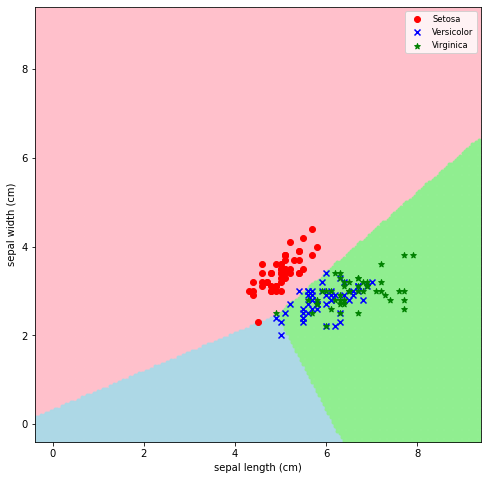

( 2 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 90.0%


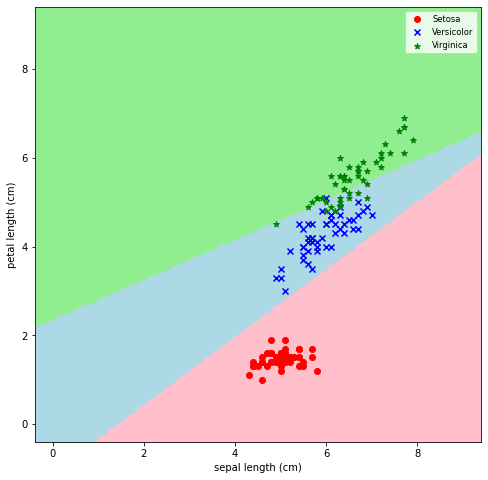

( 3 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 88.66666666666667%


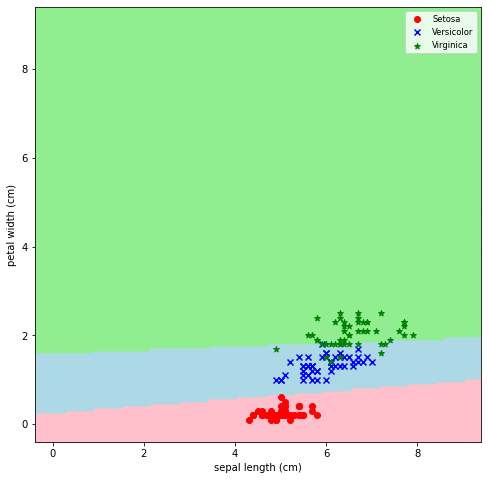

( 4 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 88.66666666666667%


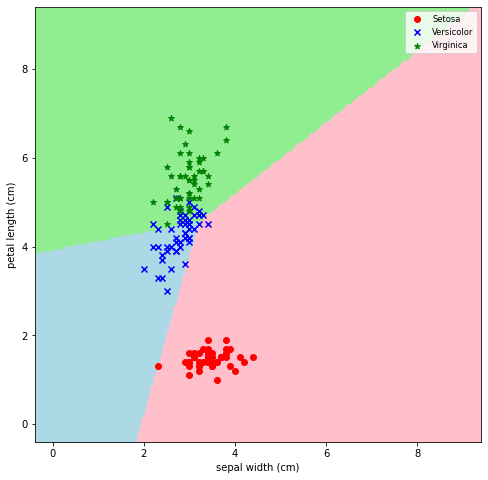

( 5 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 84.0%


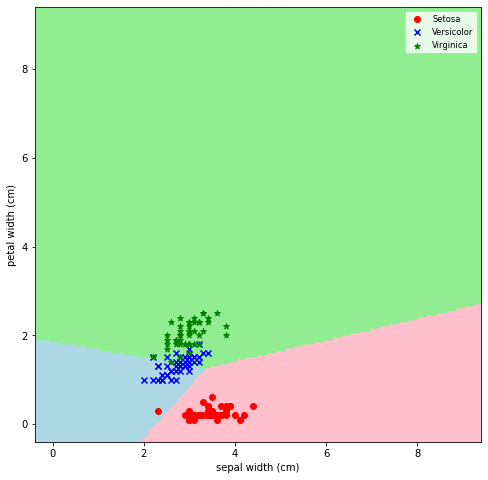

( 6 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 90.66666666666666%


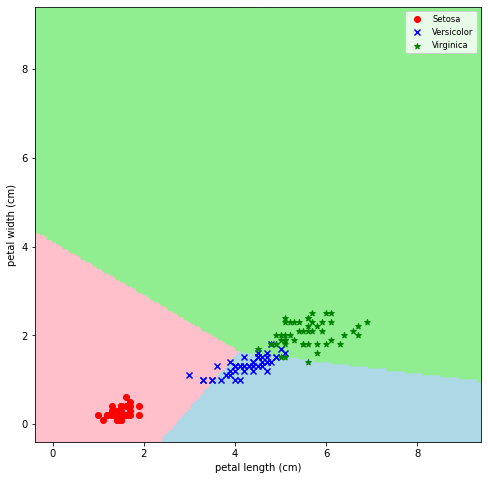

In [ ]:
for classes in select_3C:
    for feature in select_2F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=SGDClassifier, loss='modified_huber')
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

### For Logistic Regression

( 7 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy for the LogisticRegression model: 82.0%


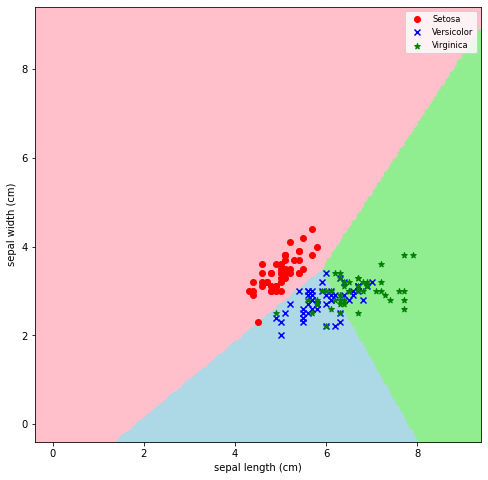

( 8 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy for the LogisticRegression model: 96.0%


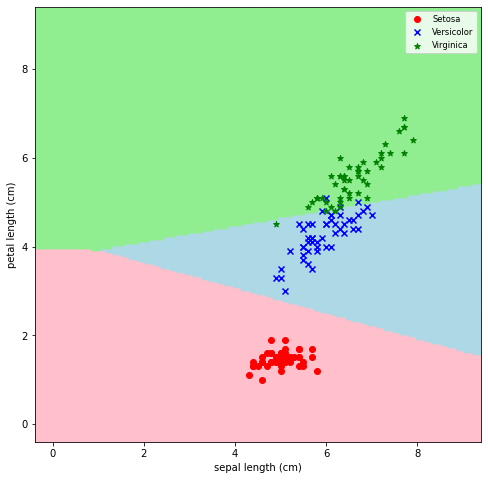

( 9 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy for the LogisticRegression model: 96.0%


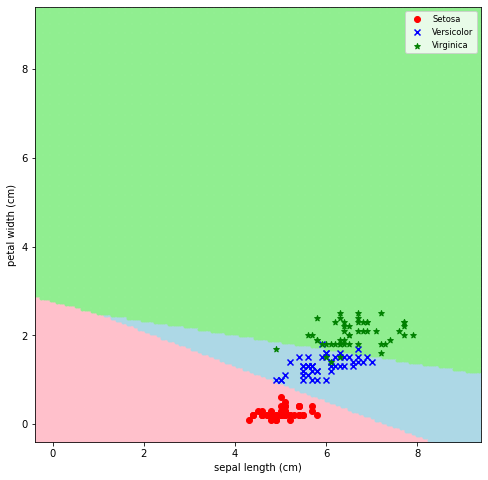

( 10 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy for the LogisticRegression model: 95.33333333333334%


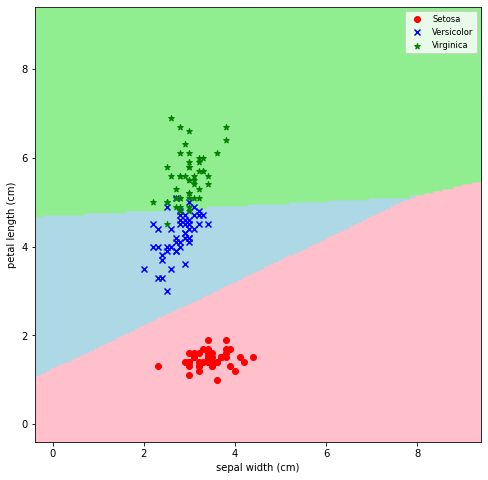

( 11 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy for the LogisticRegression model: 96.0%


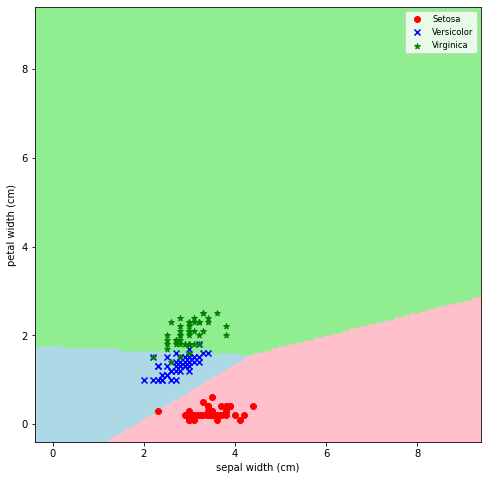

( 12 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy for the LogisticRegression model: 96.66666666666667%


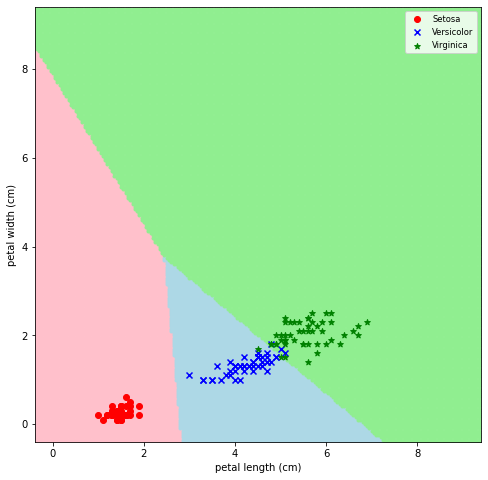

In [ ]:
for classes in select_3C:
    for feature in select_2F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=LogisticRegression)
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

### For Support vector machine with **Linear** kernel

( 13 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy for the SVC model: 82.0%


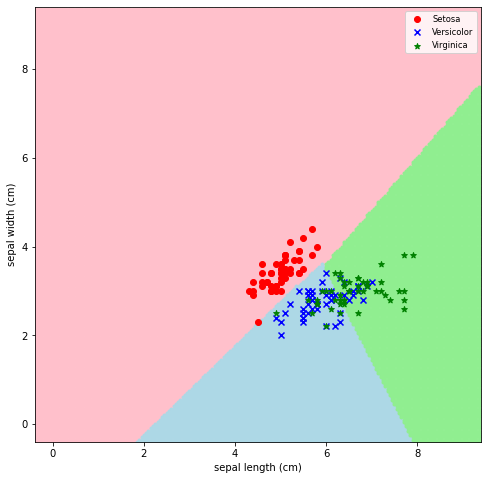

( 14 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy for the SVC model: 95.33333333333334%


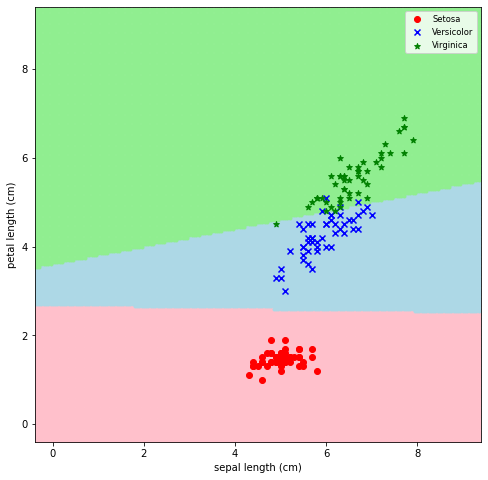

( 15 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy for the SVC model: 96.0%


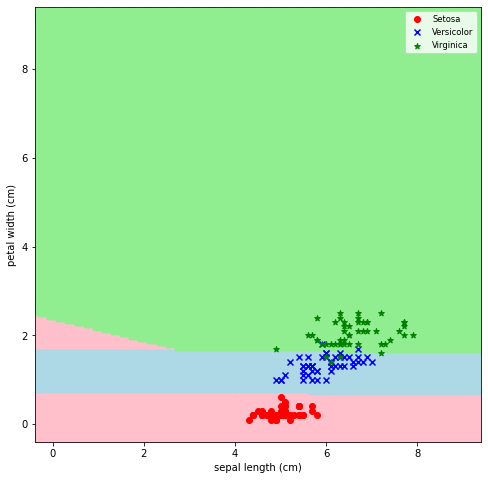

( 16 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SVC model: 96.0%


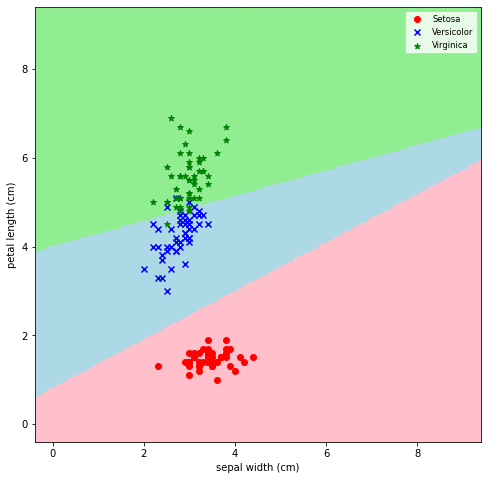

( 17 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SVC model: 96.0%


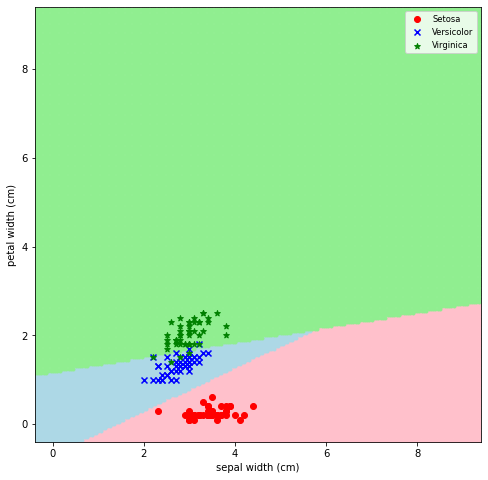

( 18 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy for the SVC model: 96.66666666666667%


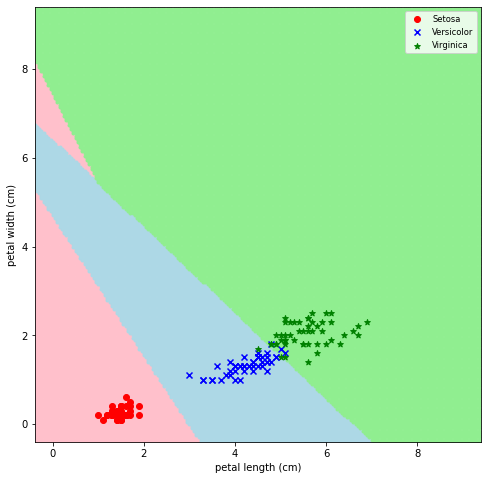

In [ ]:
for classes in select_3C:
    for feature in select_2F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=SVC, kernel='linear')
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

### For Support vector machine with **Polynomial** kernel

( 19 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy for the SVC model: 81.33333333333333%


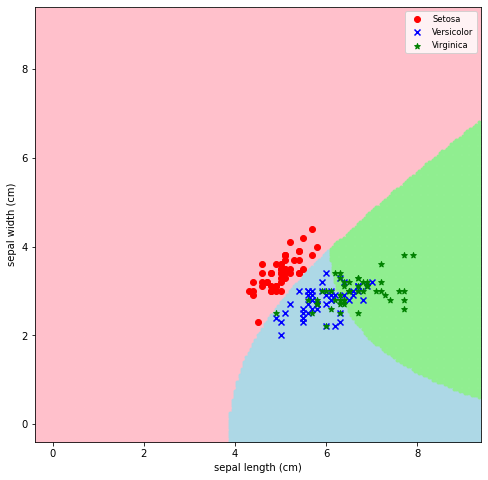

( 20 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy for the SVC model: 96.0%


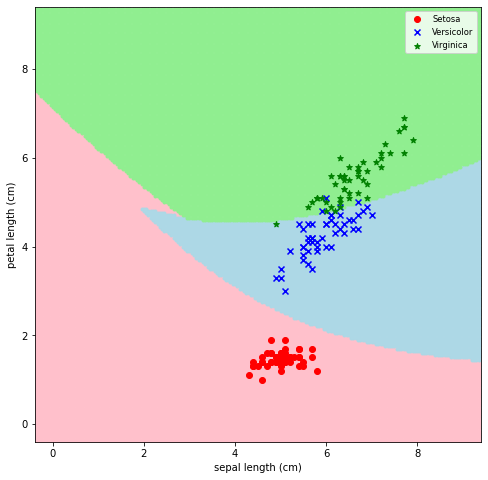

( 21 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy for the SVC model: 95.33333333333334%


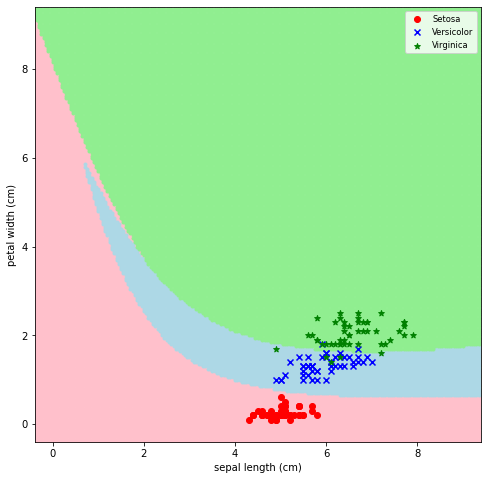

( 22 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SVC model: 95.33333333333334%


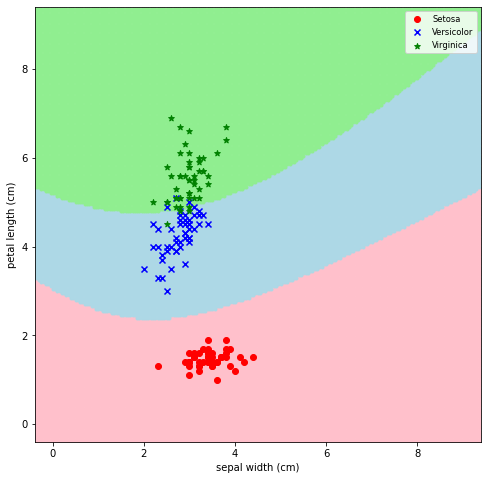

( 23 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SVC model: 96.0%


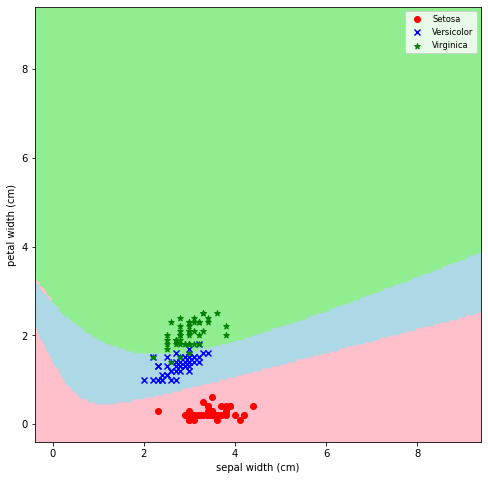

( 24 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy for the SVC model: 96.66666666666667%


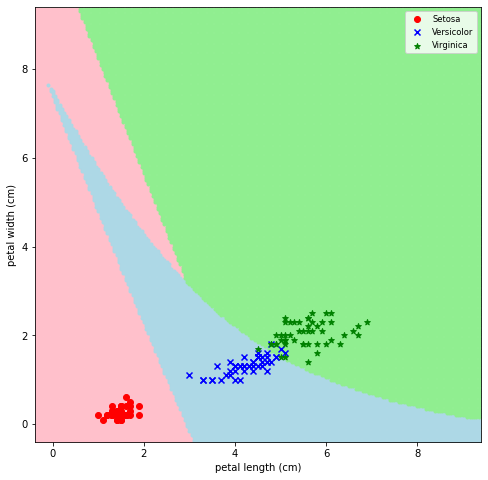

In [ ]:
for classes in select_3C:
    for feature in select_2F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=SVC, kernel='poly')
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

### For Support vector machine with **RBF** kernel

( 25 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy for the SVC model: 82.0%


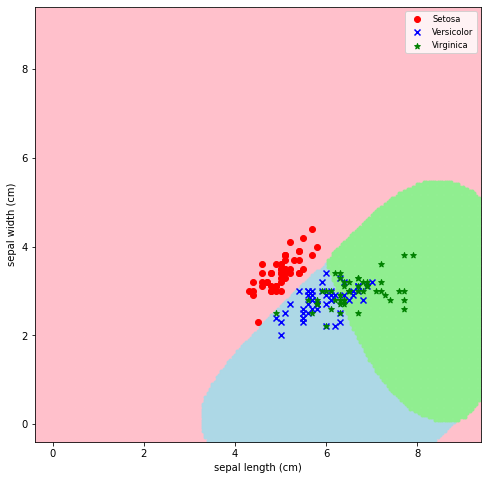

( 26 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy for the SVC model: 96.0%


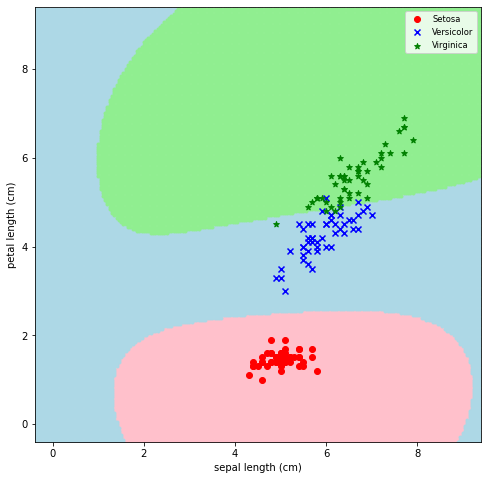

( 27 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy for the SVC model: 96.0%


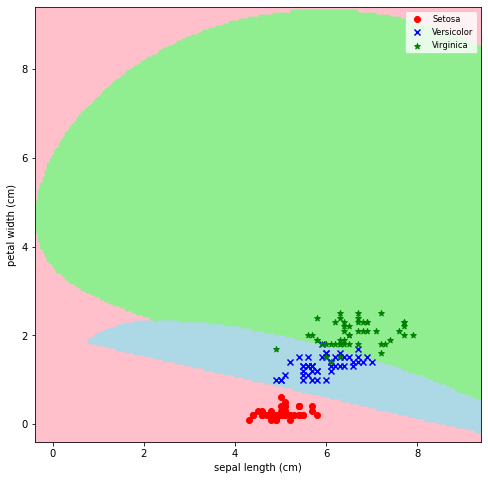

( 28 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SVC model: 95.33333333333334%


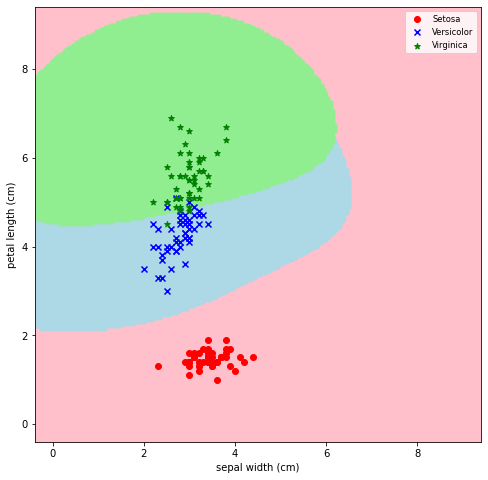

( 29 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SVC model: 96.0%


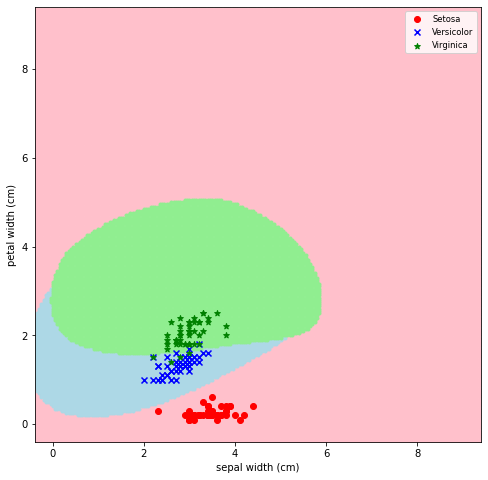

( 30 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy for the SVC model: 95.33333333333334%


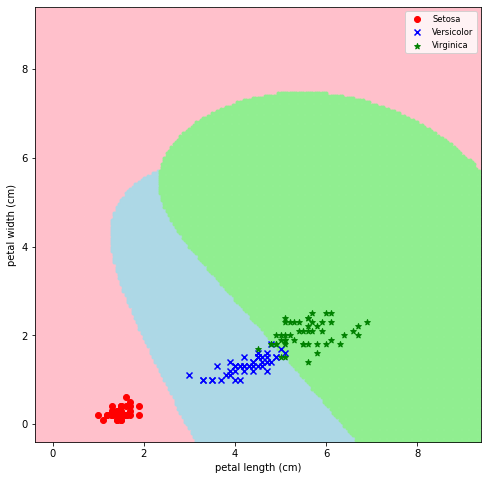

In [ ]:
for classes in select_3C:
    for feature in select_2F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=SVC, kernel='rbf')
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

### Observation

Classes/Features | Sepal Length & Sepal Width | Sepal Length & Petal Length  | Sepal Length & Petal Width | Sepal Width & Petal Length  | Sepal Width & Petal Width | Petal Length & Petal Width 
----|------|--------|-------|-------------|------------|--------------- 
SGDClassifier|68|90  |88.67|88.67   |84|90.67
LogisticRegression|82|96   |96   |95.34|96|96.67
SVC (Linear)|82|95.34|96   |96   |96|96.67 
SVC (Polynomial)|81.33|96|95.34|95.34|96|96.67  
SVC (RBF)|82|96|96|95.34|96|95.34


One thing that I observed here is that during every run I get **different** accuracy result for the **SGDClassifier** whereas for other 4 model its the same accuracy in every run.

As from the observation table above we can conclude that our model `LogisticRegression`,`SVC (linear kernel)`, `SVC (Polynomial Kernel)`, and `SVC (Gaussian kernel)` have the same performace accuracy with the given dataset and the `SGDClassifier` is the only model whose performance is low in comparision to the other's. 

### Explanation

For this assignment the SGDClassifier was modified by using the different loss funcition i.e. modified-Huber loss function, We can noticed that the performance accuracy is worse than the (default loss function: Hinge loss) (from last assignment) which does make sense as we can see in the image below that the Modified Huber loss function has low tolerance to the outlier then the Hinge loss.

<img src="https://fa.bianp.net/blog/images/2014/loss_functions.png">

The next classifier used was the LogisticRegression which uses the One Vs Rest (OVR) scheme. This model accuracy is similar to rest of the other model as shown and described in the Observation above. <br>
Then for the rest of the model we used the Support Vector Machine (SVM) classifier (SVC) with different Kernel.<br>
Using the Linear kernel we can see that in the graph the decision boundary are linear meaning the dataset are seperated linearly.<br>
For the second and third, we used the Polynomial and Gaussian kernel as in case of non-linearly separable data, the simple linear SVM algorithm cannot be used. We can see in the graph that the decision boundary are not linear anymore. Basically, the kernel SVM projects the non-linearly seperable data lower dimensions to linearly separable data in higher dimensions in such a way that data points belonging to different classes are allocated to different dimensions.